Makes plots of the covariance matrix and broken up by contribution type.

Inputs for this notebook are text files of the null model covariance matrix. all are saved in: /cluster/tufts/wongjiradlabnu/gen1_oscanalysis/SBNfitoutputs

One could regenerate these for any desired osc parameters by adding a save to text file line while running sbnfit studies.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from matplotlib import cm
from root_pandas import read_root
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
import ROOT
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines
from scipy.stats import chi2
from scipy import interpolate
import pandas as pd
import math
import matplotlib.colors as colors
import pickle as pkl

Welcome to JupyROOT 6.16/00


Get values from text files which have the frquentist study results

List of already made input files: (contain both null and maximum oscillation parameters. max osc used in CovMatrixPlots_MaxOsc)
* cov_det_big_220314.txt  - detvar only 
* cov_flux_big_220314.txt - flux sys only
* cov_piotest_big_220314.txt -tested only pi0 samples, only all UB genie uncertainties in response to EB question
* cov_reint_big_220314.txt -reint sys only, null oscillation
* cov_stat_big_220314.txt - MC stat only, null oscillation
* cov_tot_big_220314.txt - tot cov, null oscilltion. THIS IS THE MAIN ONE.
* cov_xsec_big_220314.txt - xsec sys only, null oscillation 

In [2]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_flux=[]
with open("cov_piotest_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_flux.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


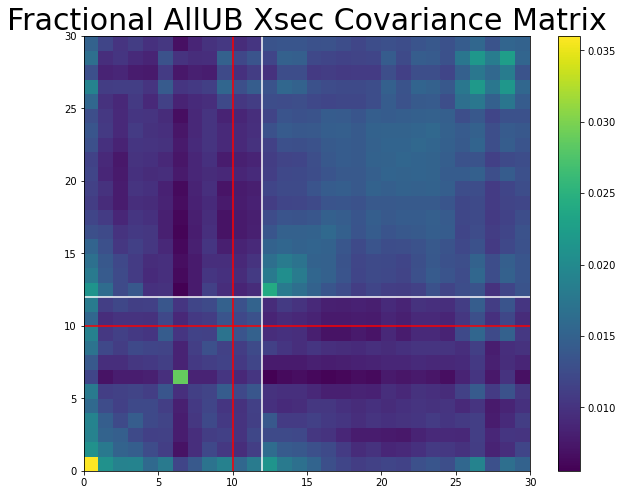

In [3]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_flux)
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional AllUB Xsec Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_pi0test_null.p",'wb'))
plt.show()
plt.close()

In [4]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_flux=[]
with open("cov_flux_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_flux.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


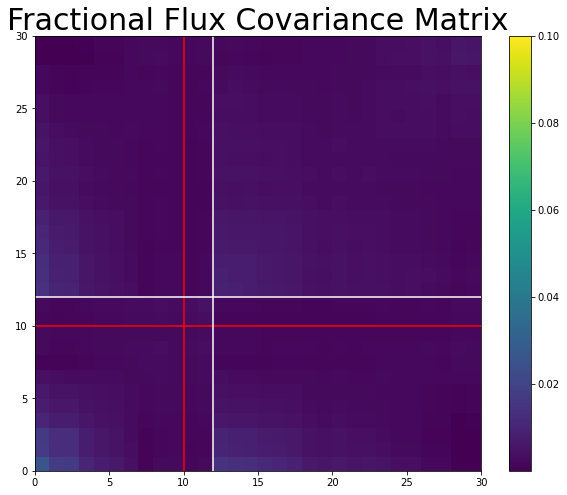

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


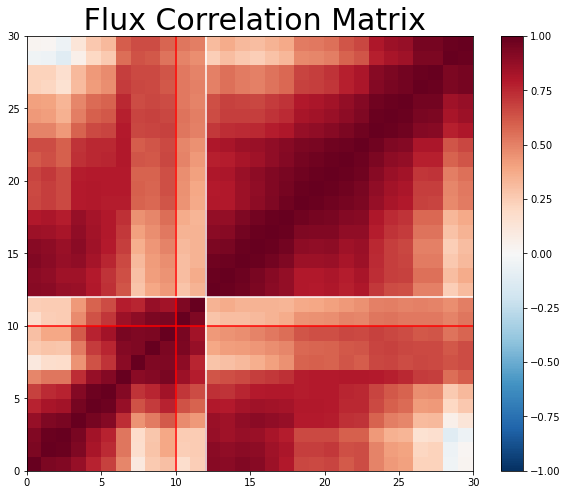

In [5]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_flux,norm=colors.Normalize(vmin=0.00001, vmax=.1))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Flux Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_flux_null.p",'wb'))
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_flux[i][j]/(math.sqrt(cov_flux[i][i])*math.sqrt(cov_flux[j][j]))
            
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" Flux Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_flux_null.p",'wb'))
plt.show()
plt.close()

In [6]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_reint=[]
with open("cov_reint_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_reint.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


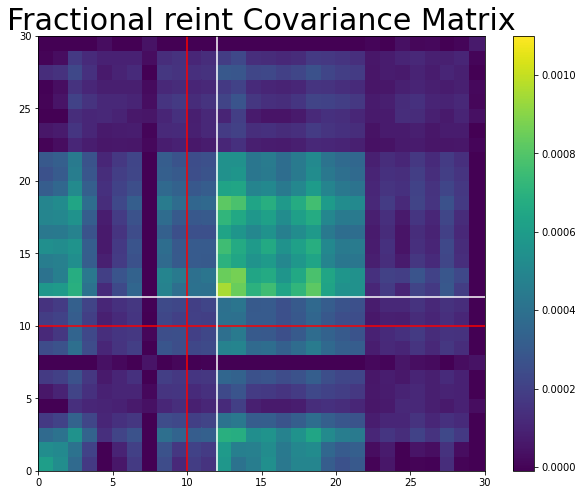

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


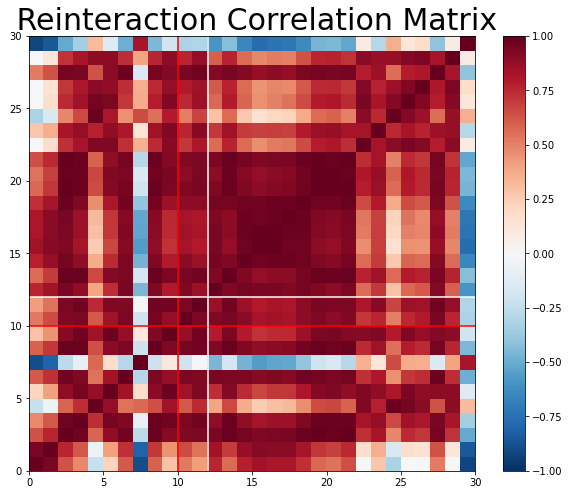

In [7]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_reint,norm=colors.Normalize(vmin=-.00001, vmax=.0011))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional reint Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_reint_null.p",'wb'))
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_reint[i][j]/(math.sqrt(cov_reint[i][i])*math.sqrt(cov_reint[j][j]))
            
fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" Reinteraction Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_reint_null.p",'wb'))
plt.show()
plt.close()


In [8]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_xsec=[]
with open("cov_xsec_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_xsec.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


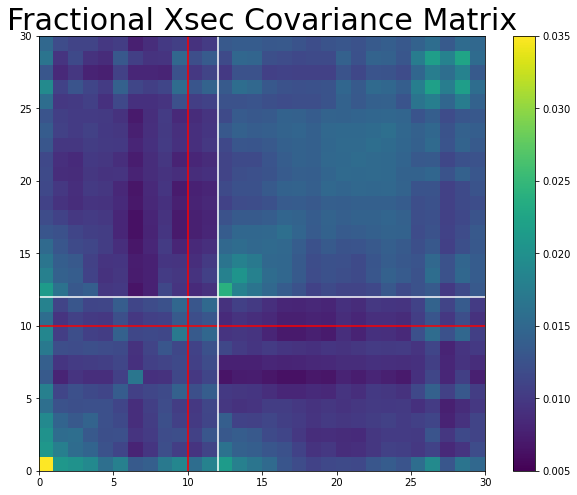

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


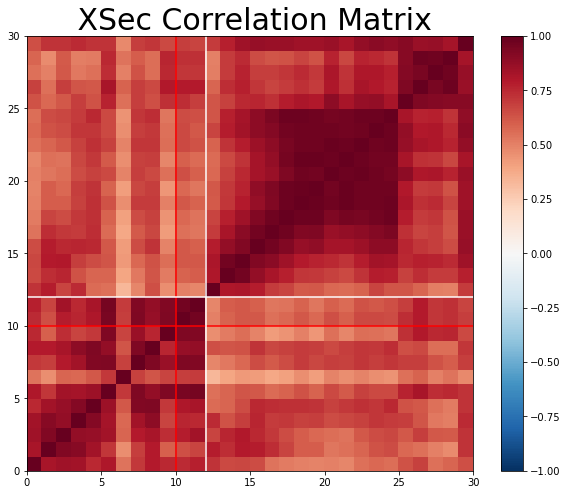

In [9]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_xsec,norm=colors.Normalize(vmin=.005, vmax=.035))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional Xsec Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_xsec_null.p",'wb'))
plt.show()
plt.close()


corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_xsec[i][j]/(math.sqrt(cov_xsec[i][i])*math.sqrt(cov_xsec[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" XSec Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_xec_null.p",'wb'))
plt.show()
plt.close()

In [10]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_det=[]
with open("cov_det_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_det.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


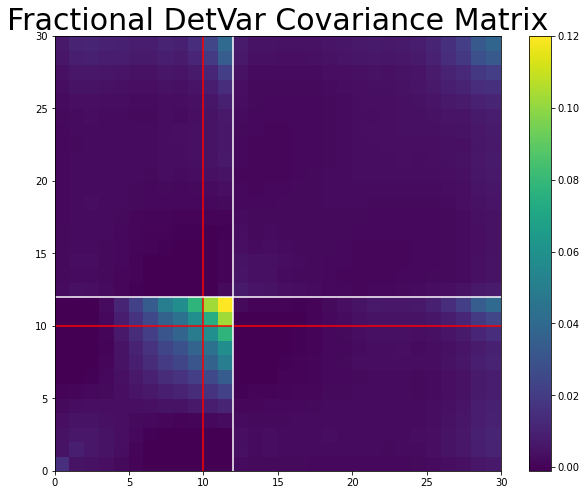

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


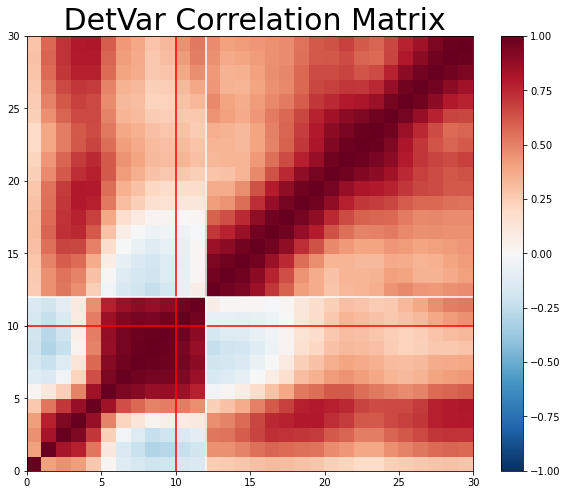

In [11]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_det,norm=colors.Normalize(vmin=-.001, vmax=.12))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional DetVar Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_det_null.p",'wb'))
plt.show()
plt.close()


corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_det[i][j]/(math.sqrt(cov_det[i][i])*math.sqrt(cov_det[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" DetVar Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_det_null.p",'wb'))
plt.show()
plt.close()

In [12]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_stat=[]
with open("cov_stat_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_stat.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


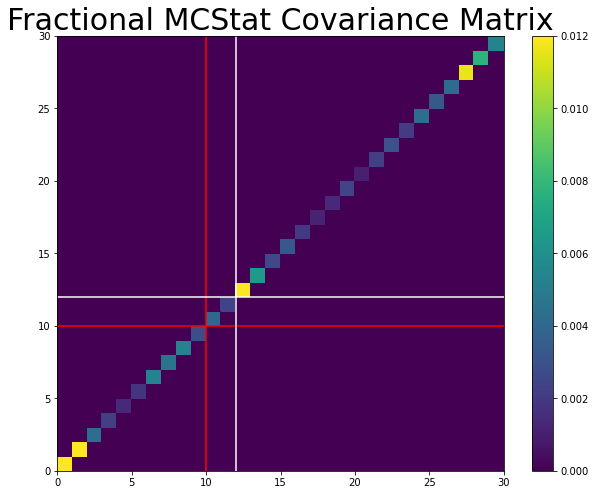

/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


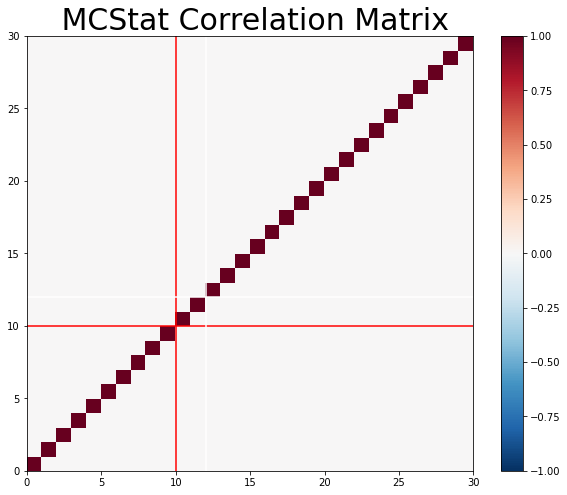

In [13]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_stat,norm=colors.Normalize(vmin=0, vmax=0.012))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Fractional MCStat Covariance Matrix",fontsize=30)
pkl.dump(fig,open("cov_stat_null.p",'wb'))
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_stat[i][j]/(math.sqrt(cov_stat[i][i])*math.sqrt(cov_stat[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title(" MCStat Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_pi0test_null.p",'wb'))
plt.show()
plt.close()

In [14]:
nbinse=12
nbinsmu=19
nbins = nbinse+nbinsmu

cov_full=[]
with open("cov_tot_big_220314.txt","r") as chis:
    lines = chis.readlines()
    for i in range(nbins):
#         i+=nbins
        lines[i].strip()
        vals0 = lines[i].split(" ")
        val_list= []
        for v in range(len(vals0)-1):
            val_list.append(float(vals0[v]))
        cov_full.append(val_list)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


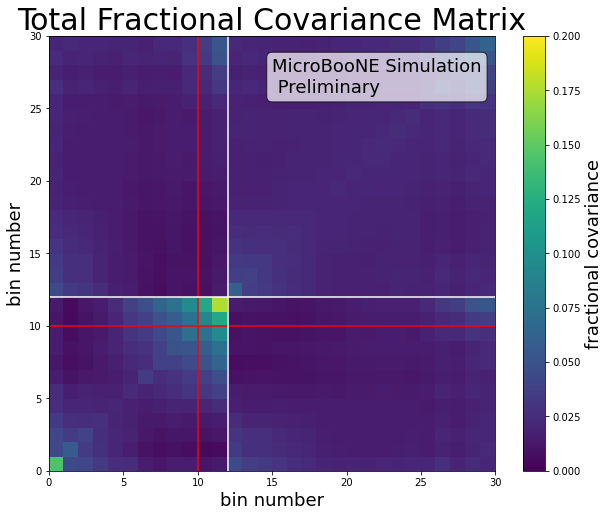

/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


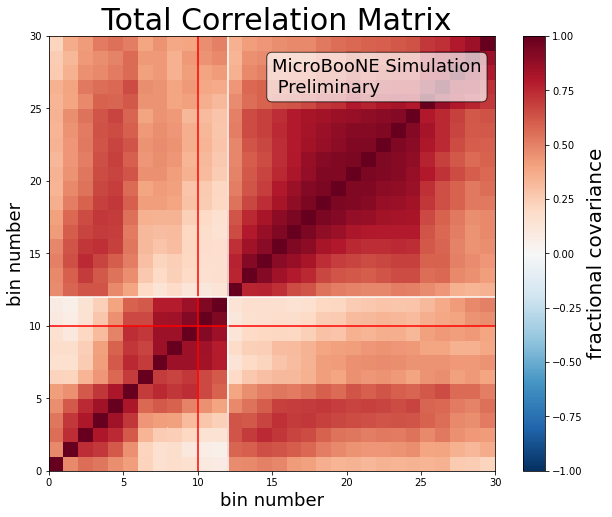

In [15]:
binslist=[i for i in range(12+19)]
y,x = np.meshgrid(binslist, binslist)

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, cov_full,norm=colors.Normalize(vmin=0, vmax=0.2))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.title("Total Fractional Covariance Matrix",fontsize=30)
plt.xlabel('bin number',fontsize=18)
plt.ylabel('bin number',fontsize=18)
cbar.set_label(r'fractional covariance',rotation=90,fontsize=18)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
pkl.dump(fig,open("cov_tot_null.p",'wb'))
plt.show()
plt.close()

corr = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range (nbins):
         corr[i][j] = cov_full[i][j]/(math.sqrt(cov_full[i][i])*math.sqrt(cov_full[j][j]))

fig,ax = plt.subplots(figsize=(10,8))
plt.pcolormesh(x, y, corr,norm=colors.Normalize(vmin=-1, vmax=1),cmap=plt.cm.get_cmap('RdBu_r'))
cbar = plt.colorbar()
plt.plot([0,30],[10,10],color='red')
plt.plot([10,10],[0,30],color='red')
plt.plot([0,30],[12,12],color='white')
plt.plot([12,12],[0,30],color='white')
plt.xlabel('bin number',fontsize=18)
plt.ylabel('bin number',fontsize=18)
cbar.set_label(r'fractional covariance',rotation=90,fontsize=20)
props = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(0.5, 0.95, 'MicroBooNE Simulation\n Preliminary', transform=ax.transAxes, fontsize=18,
        verticalalignment='top', bbox=props)
plt.title(" Total Correlation Matrix",fontsize=30)
pkl.dump(fig,open("corr_tot_null.p",'wb'))
plt.show()
plt.close()

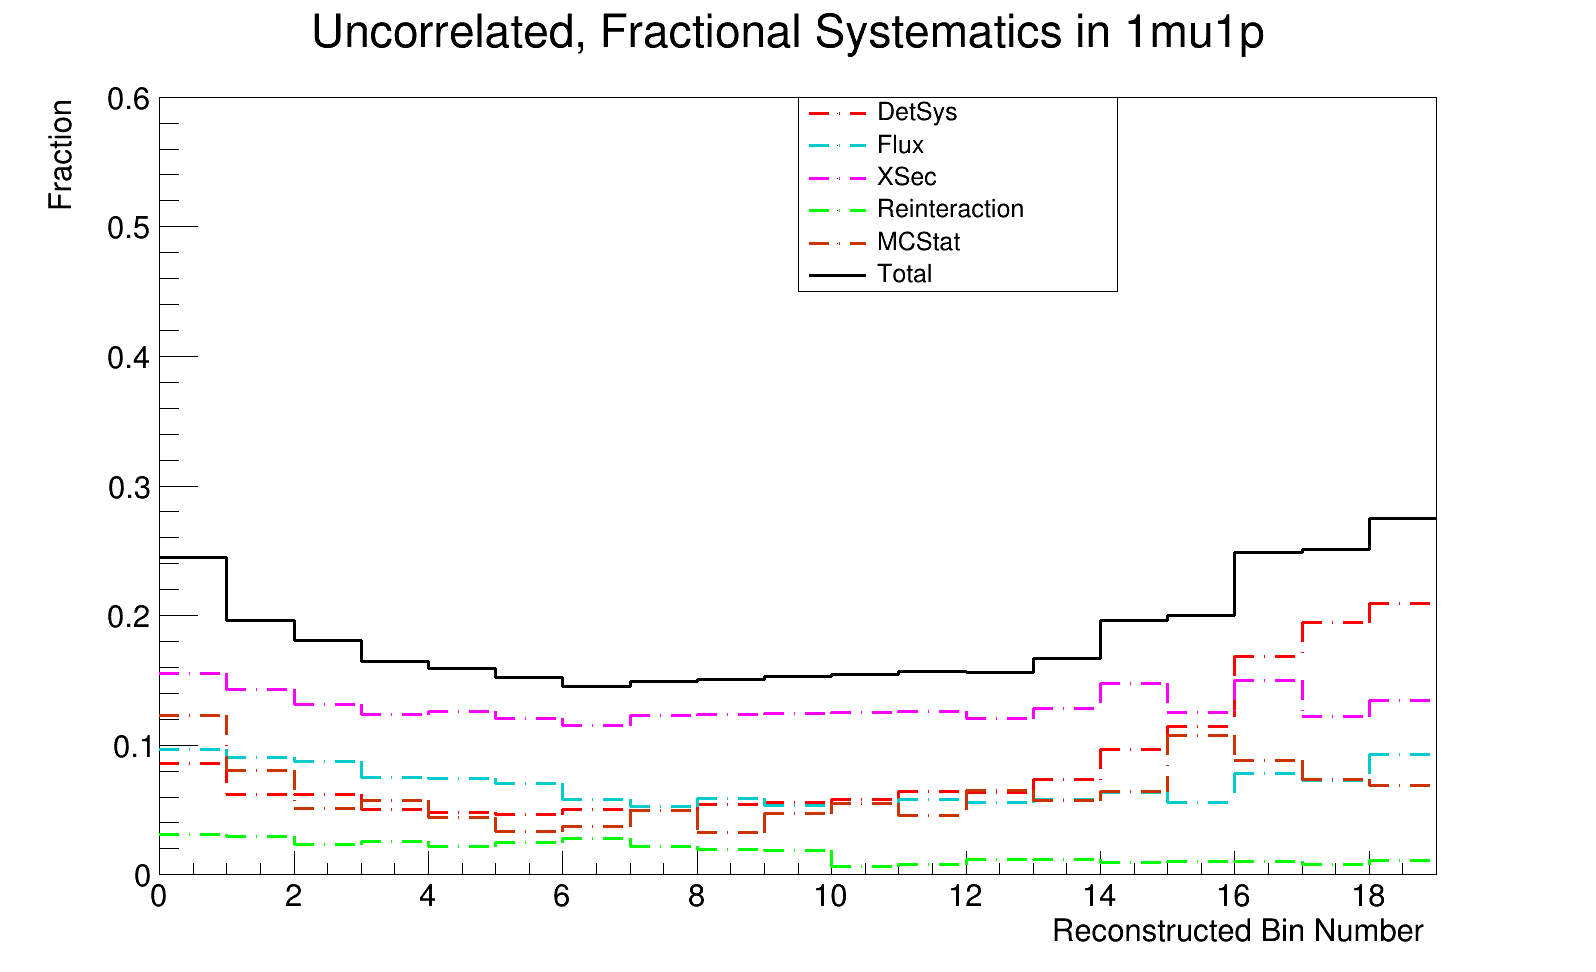

In [16]:
# Create uncorrelated systematics plot
ROOT.gStyle.SetOptStat(0)
hist_names = ['DetSys','Flux','XSec','Reinteraction','MCStat','Total']
colors     =[ROOT.kRed,ROOT.kCyan+1,ROOT.kMagenta,ROOT.kGreen,ROOT.kOrange+9,ROOT.kBlack]
styles     =[10,10,10,10,10,1]
hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinsmu,0,nbinsmu) for i in range(len(hist_names))]
covs_v     = [cov_det,cov_flux,cov_xsec,cov_reint,cov_stat,cov_full]
# hist_names = ['DetSys']
# colors     =[ROOT.kRed]
# styles     =[1]
# hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinsmu,250,1200) for i in range(len(hist_names))]
# covs_v     = [newcov]
max_val = 0
for i in range(len(hist_v)):
    for b in range(nbinsmu):
        hist_v[i].SetBinContent(b+1,np.sqrt(covs_v[i][b+nbinse][b+nbinse]))
        if np.sqrt(covs_v[i][b+nbinse][b+nbinse]) > max_val:
            max_val = np.sqrt(covs_v[i][b+nbinse][b+nbinse])
canv = ROOT.TCanvas("Uncorrelated Systematics","Uncorrelated Systematics",1600,1000)
hist_v[0].SetMaximum(max_val*1.1)
hist_v[0].SetLineColor(colors[0])
hist_v[0].SetLineStyle(10)
hist_v[0].SetLineWidth(3)
hist_v[0].Draw()
hist_v[0].SetTitle("Uncorrelated, Fractional Systematics in 1mu1p")
hist_v[0].SetXTitle("Reconstructed Bin Number")
hist_v[0].SetYTitle("Fraction")
hist_v[0].GetYaxis().SetRangeUser(0., .6)
for i in range(1,len(hist_v)):
    hist_v[i].SetLineColor(colors[i])
    hist_v[i].SetLineWidth(3)
    hist_v[i].SetLineStyle(styles[i])
    hist_v[i].Draw("SAME")
legend = ROOT.TLegend(0.5,0.7,0.7,0.9)
for i in range(len(hist_names)):
    legend.AddEntry(hist_v[i],hist_names[i])
legend.Draw()
canv.Draw()
pkl.dump(canv,open("sys_1mu1p_null.p",'wb'))

Warning in <TROOT::Append>: Replacing existing TH1: DetSys (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Flux (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: XSec (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Reinteraction (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: MCStat (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Total (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Uncorrelated Systematics


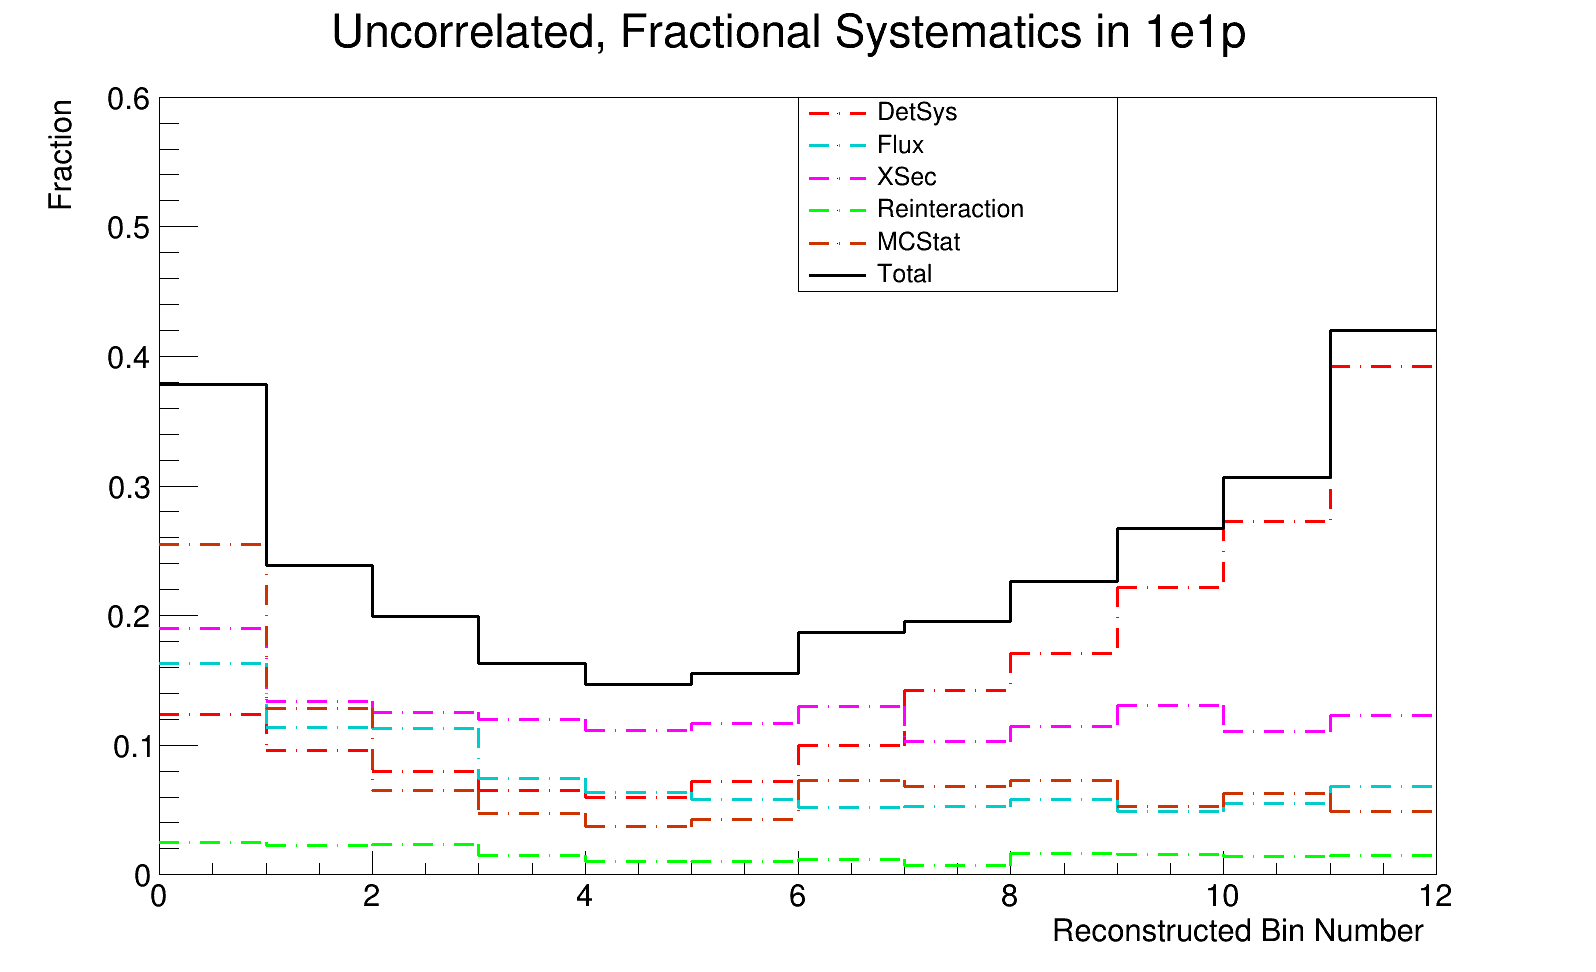

In [17]:
# Create uncorrelated systematics plot
ROOT.gStyle.SetOptStat(0)
hist_names = ['DetSys','Flux','XSec','Reinteraction','MCStat','Total']
colors     =[ROOT.kRed,ROOT.kCyan+1,ROOT.kMagenta,ROOT.kGreen,ROOT.kOrange+9,ROOT.kBlack]
styles     =[10,10,10,10,10,1]
hist_v = [ROOT.TH1D(hist_names[i],hist_names[i],nbinse,0,nbinse) for i in range(len(hist_names))]
covs_v     = [cov_det,cov_flux,cov_xsec,cov_reint,cov_stat,cov_full]
max_val = 0
for i in range(len(hist_v)):
    for b in range(nbinse):
        hist_v[i].SetBinContent(b+1,np.sqrt(covs_v[i][b][b]))
        if np.sqrt(covs_v[i][b][b]) > max_val:
            max_val = np.sqrt(covs_v[i][b][b])
canv = ROOT.TCanvas("Uncorrelated Systematics","Uncorrelated Systematics",1600,1000)
hist_v[0].SetMaximum(max_val*1.1)
hist_v[0].SetLineColor(colors[0])
hist_v[0].SetLineStyle(10)
hist_v[0].SetLineWidth(3)
hist_v[0].Draw()
hist_v[0].SetTitle("Uncorrelated, Fractional Systematics in 1e1p")
hist_v[0].SetXTitle("Reconstructed Bin Number")
hist_v[0].SetYTitle("Fraction")
hist_v[0].GetYaxis().SetRangeUser(0., .6)
for i in range(1,len(hist_v)):
    hist_v[i].SetLineColor(colors[i])
    hist_v[i].SetLineWidth(3)
    hist_v[i].SetLineStyle(styles[i])
    hist_v[i].Draw("SAME")
legend = ROOT.TLegend(0.5,0.7,0.7,0.9)
for i in range(len(hist_names)):
    legend.AddEntry(hist_v[i],hist_names[i])
legend.Draw()
canv.Draw()
pkl.dump(canv,open("sys_1e1p_null.p",'wb'))

In [18]:
cv_e=[1.77973, 3.299, 2.8411, 2.84015, 3.06677, 2.90407, 2.99971, 2.52731, 2.45532, 2.19775, 6.17792, 2.0456]
cv_m=[31.1745, 197.417, 285.531, 385.361, 347.205, 422.695, 449.114, 415.666, 375.7, 334.369, 314.139, 268.595, 221.893, 192.872, 152.109, 116.597, 90.355, 72.8464, 65.4711]
cvSpec =cv_m
normUnc_sqrtDen = 0
for v in cvSpec:
    normUnc_sqrtDen +=v
normUnc_Den = normUnc_sqrtDen*normUnc_sqrtDen
print(normUnc_Den)


22459163.592100006


In [19]:
normUncDetSys_Num  = 0
normUncFlux_Num    = 0
normUncXSec_Num    = 0
normUncReinter_Num = 0
normUncStat_Num  = 0
normUncTotal_Num   = 0
normUncTotal       = 0
for i in range(12,31):
    for j in range(12,31):
        normUncDetSys_Num  += cov_det[i][j]*cvSpec[i-12]*cvSpec[j-12]
        normUncFlux_Num    += cov_flux[i][j]*cvSpec[i-12]*cvSpec[j-12]
        normUncXSec_Num    += cov_xsec[i][j]*cvSpec[i-12]*cvSpec[j-12]
        normUncReinter_Num += cov_reint[i][j]*cvSpec[i-12]*cvSpec[j-12]
        normUncStat_Num += cov_stat[i][j]*cvSpec[i-12]*cvSpec[j-12]
        normUncTotal_Num   += cov_full[i][j]*cvSpec[i-12]*cvSpec[j-12]
        
print("DetSys:        ",100*np.sqrt(normUncDetSys_Num/normUnc_Den))
print("Flux:          ",100*np.sqrt(normUncFlux_Num/normUnc_Den))
print("XSec:          ",100*np.sqrt(normUncXSec_Num/normUnc_Den))
print("Reinteraction: ",100*np.sqrt(normUncReinter_Num/normUnc_Den))
print("MCstat: ",100*np.sqrt(normUncStat_Num/normUnc_Den))
print("Total:         ",100*np.sqrt(normUncTotal_Num/normUnc_Den))

DetSys:         5.294158930195491
Flux:           5.926491458136276
XSec:           11.759250705847617
Reinteraction:  1.7597322059927583
MCstat:  1.2748366249350718
Total:          14.49708299209475


In [20]:
print(math.sqrt(0.014))
print(cov_det[0][0])

0.11832159566199232
0.0152858
